## Project#1 Notebook

## Function to Call

In [69]:
# implimination
import numpy as np

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC

In [3]:
def file_load(file_name):
    return  np.loadtxt(file_name, delimiter='\t',skiprows=7)

In [4]:
def plot(data_array, filename):
    X1 = data_array[:, 0]
    X2= data_array[:, 1]
    label = data_array[:, 2]
    for i in set(label):
        index = label == i
        plt.scatter(X1[index], X2[index], label=f'class {i}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'original data of {filename}')
    plt.show()

In [5]:
def SVM_test(data_array,file_name,kernel,c):
    X=data_array[:,:2]
    Y=data_array[:,2].astype(int)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    svm_model=SVC(C=c,kernel=kernel)
    svm_model.fit(x_train,y_train)
    plt.figure()
    plot_decision_regions(x_train, y_train, clf=svm_model, legend=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'SVM data of {file_name} with C = {c} Kernel ={kernel}')
    plt.show()

In [6]:
def SVM_tune(x_train,y_train):
    svm_model = SVC()
    parmaters={'C':np.linspace(0.01,10,5),'gamma':np.linspace(0.01,10,5),'kernel':['rbf']}
    
    tuned_sv_model = GridSearchCV(svm_model,parmaters,cv=10,scoring='accuracy')
    tuned_sv_model.fit(x_train,y_train)
    print('model best score = ',tuned_sv_model.best_score_)
    return tuned_sv_model.best_params_

In [7]:
def SVM_best_train(data_array,file_name):
    X=data_array[:,:2]
    Y=data_array[:,2].astype(int)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    tuned_prammeters=SVM_tune(x_train,y_train)
    c=tuned_prammeters['C']
    Gamma=tuned_prammeters['gamma']
    Kernel= tuned_prammeters['kernel']
    svm_model=SVC(C=c,kernel=Kernel)
    svm_model.fit(x_train,y_train)
    acc = metrics.accuracy_score(y_test, svm_model.predict(x_test))
    print('Accuracy of model on test data =',acc)
    plt.figure()
    plot_decision_regions(x_train, y_train, clf=svm_model, legend=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'The Best SVM data of {file_name} with  C = {c} and gamma ={Gamma} and Kernel ={Kernel}')
    plt.show()

## Aggregation.txt

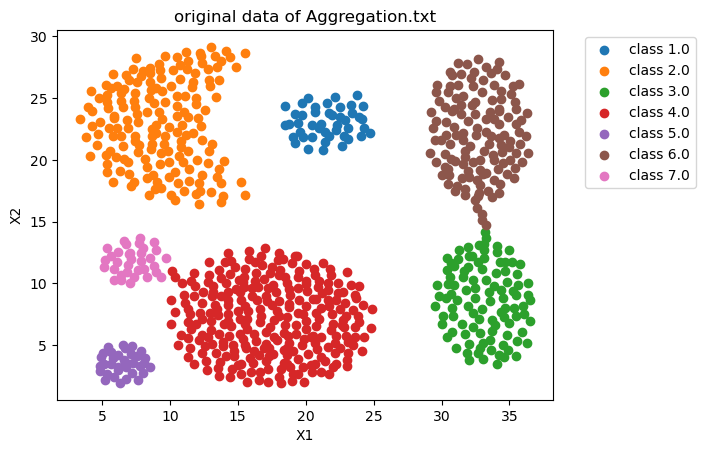

In [78]:
## get data and split plot the orginal data 
file_name = 'Aggregation.txt'
data_array = file_load(file_name)
X=data_array[:,:2]
Y=data_array[:,2].astype(int)
plot(data_array, file_name)

## Comment

The Aggregation dataset comprises 7 labeled classes, clearly discernible in the provided graph. The visual representation indicates a clean and distinct separation among classes, with noticeable space between each class. This suggests that the data is well-structured, allowing for potential ease of classification.

## Different Kernels Without Regularization

For this analysis, three different kernels (Linear, Polynomial, RBF) were applied without regularization. In the absence of regularization, the regularization parameter (C) was set to a large value (10^6) to minimize its effect, making it negligible.

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


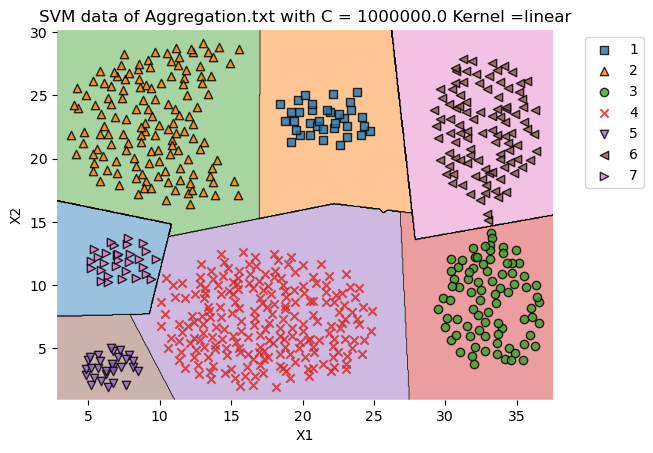

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


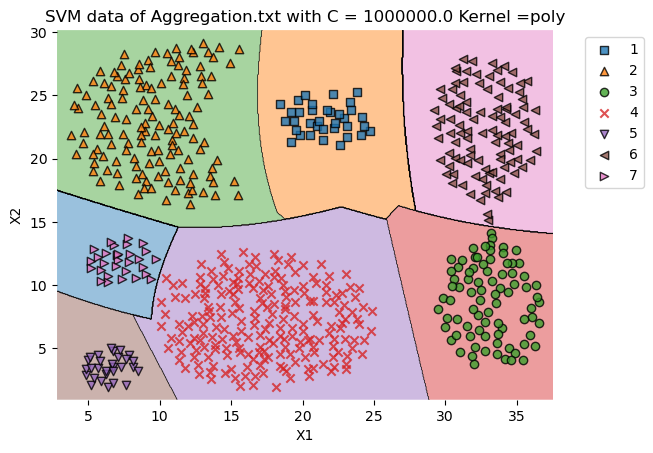

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


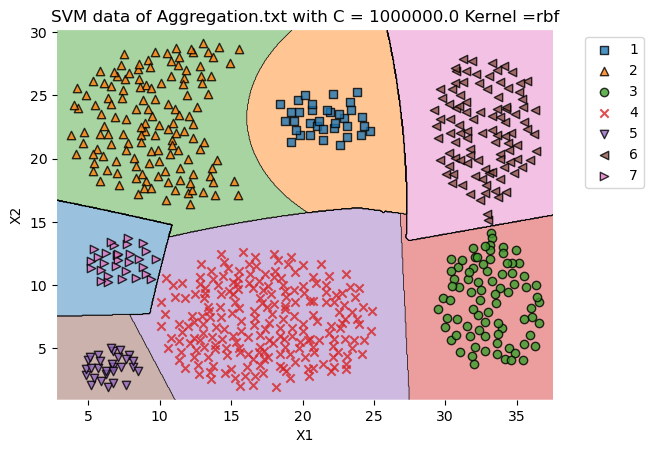

In [79]:
#Diffrent kernel  without regularization as c=1e6
SVM_test(data_array,file_name,'linear',1e6)
SVM_test(data_array,file_name,'poly',1e6)
SVM_test(data_array,file_name,'rbf',1e6)

## Comment

Since the data exhibit clean and distinct separation among classes with noticeable space between each class, the application of linear, polynomial, and RBF kernels does not show significant differences in the results. The linear classification is sufficient, and the use of polynomial and RBF kernels provides only slight variations, suggesting that the data can be effectively separated by a simple linear classifier or RPF as it give the exactly the same result.

## Use Kernels With Regularization

In this analysis, the RBF kernel, identified as the most effective from the previous analysis, was chosen. The regularization parameter (C) was varied to observe the impact on classification. Two sets of experiments were conducted: one with a soft margin (small C values - 0.01 and 0.1) and another with a hard margin (large C values - 10 and 100).

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


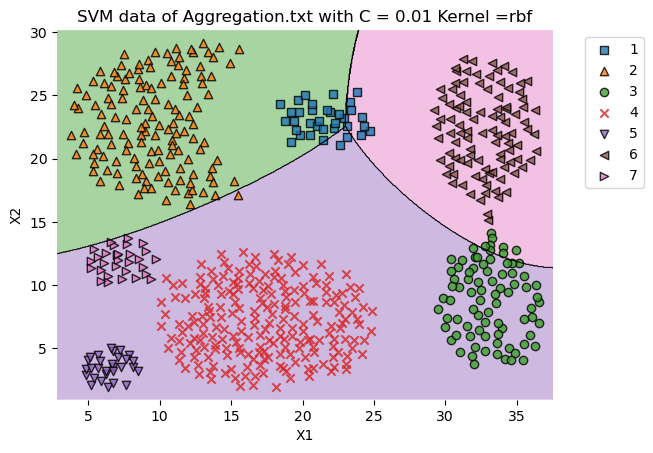

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


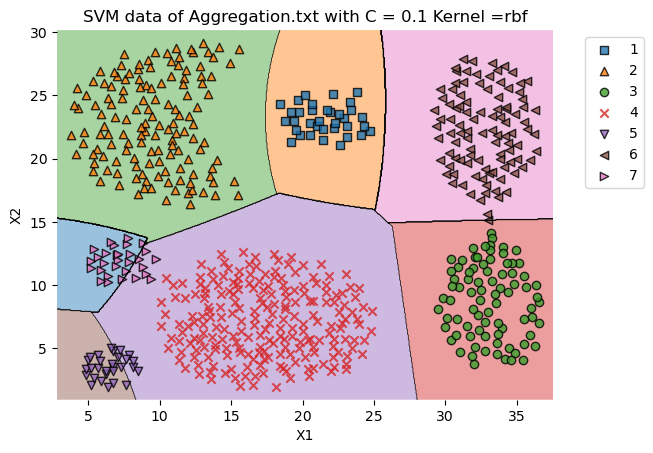

In [80]:
 # soft Magrin 
SVM_test(data_array,file_name,'rbf',0.01)
SVM_test(data_array,file_name,'rbf',0.1)

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


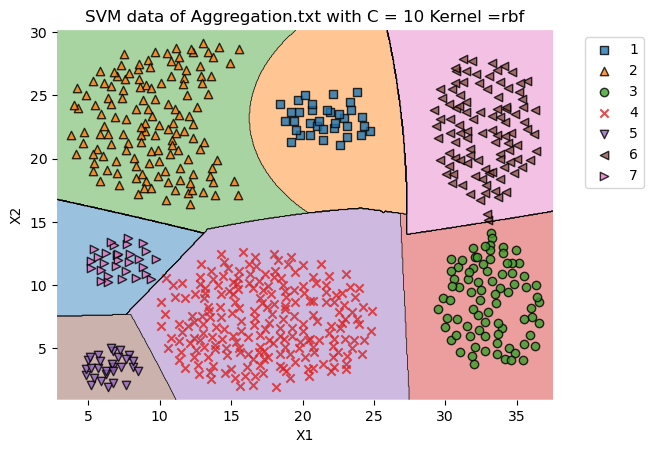

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


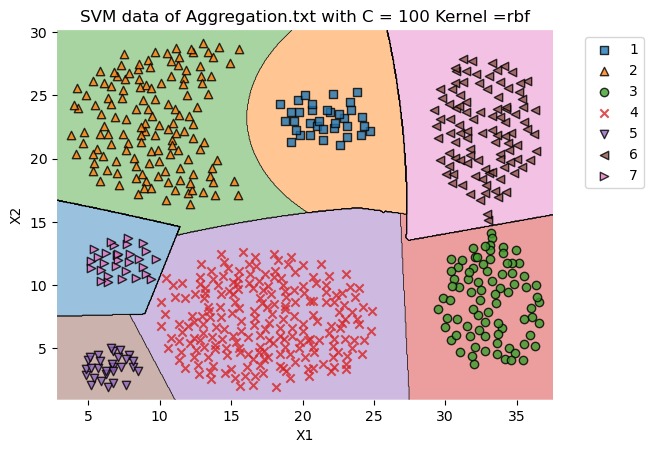

In [81]:
# Hard Magrin 
SVM_test(data_array,file_name,'rbf',10)
SVM_test(data_array,file_name,'rbf',100)

## Comment

From the above figure, the following observations are noted:

- RBF Kernel with Soft Margin (C=0.01):
  - Results: The RBF kernel with a soft margin (C=0.01) demonstrates a more flexible decision boundary. However, there is a notable grouping of labels (3, 4, 5, 6) classified together, and other misclassifications are present.
  
- RBF Kernel with Soft Margin (C=0.1):
  - Results: Increasing the soft margin (C=0.1) maintains flexibility in the decision boundary, with slightly improved classification. The grouping observed in the previous scenario is sparser, and more labels are correctly classified.

- RBF Kernel with Hard Margin (C=10 and C=100):
  - Results: The RBF kernel with a hard margin shows no significant difference between C=10 and C=100 in the figure. Both impose a stricter decision boundary, minimizing misclassification but potentially leading to overfitting. The decision boundary appears similar in both scenarios.

## GridSearchCV (Bonus)

In this section, a tuning function utilizes GridSearchCV to find optimal hyperparameters for an SVM model. The hyperparameters are tuned within specific ranges:

- `C` values range from 0.01 to 10.
- `gamma` values range from 0.01 to 10.
- Only the 'rbf' kernel is considered.

The GridSearchCV process involves a 10-fold cross-validated search over the specified parameter ranges, employing accuracy as the scoring metric. The best hyperparameters identified by GridSearchCV are printed, and the model's best score is displayed.

Subsequently, the tuned hyperparameters are used as inputs for the `SVC` function to create an SVM model. This model is then evaluated on the test data, and the resulting accuracy is also displayed.

model best score =  0.9984126984126984
Accuracy of model on test data = 0.9873417721518988


F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


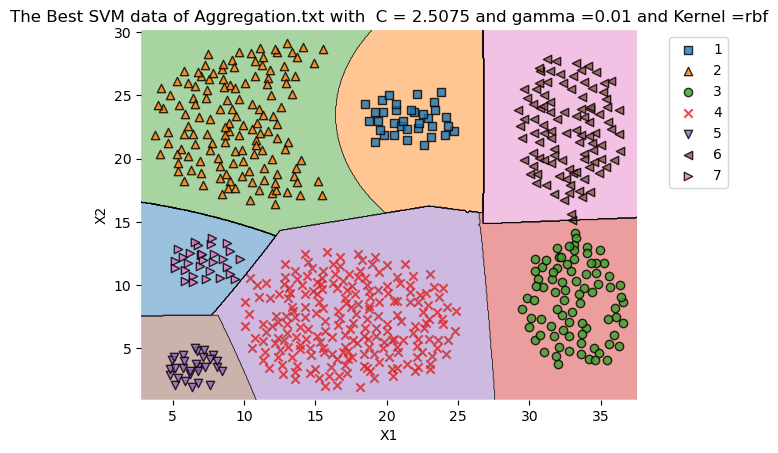

In [83]:
#Best kernel affter tuining 
SVM_best_train(data_array,file_name)

## Comment

From the above figure, optimal hyperparameters for the SVM model are identified:
- `C`: 2.5075
- `gamma`: 0.01
- Kernel: RBF

The GridSearchCV process achieved a model best score of 0.99841. Subsequently, applying these tuned hyperparameters to the SVM model and assessing it on the test data resulted in an impressive accuracy of 98.7% (0.987). This indicates that the model, based on these tuned parameters, is expected to perform well, considering the high accuracy observed.

## Compound.txt

## get data and split plot the orginal data 

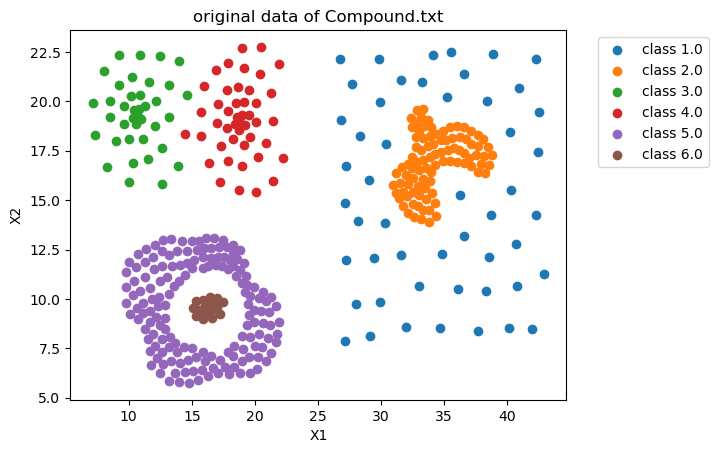

In [84]:
file_name = 'Compound.txt'
data_array = file_load(file_name)
X=data_array[:,:2]
Y=data_array[:,2].astype(int)
plot(data_array, file_name)

## Comment

In the Compound dataset, there are 6 labeled classes. Notably, classes 6, 5, and 2 exhibit a distinct separation, implying clear boundaries between these classes. On the other hand, classes 3 and 4 show less separation, and class 1 appears to span across a significant portion of space, making it less easily separable.

## Different Kernels Without Regularization

For this analysis, three different kernels (Linear, Polynomial, RBF) were applied without regularization. In the absence of regularization, the regularization parameter (C) was set to a large value (10^6) to minimize its effect, making it negligible.

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


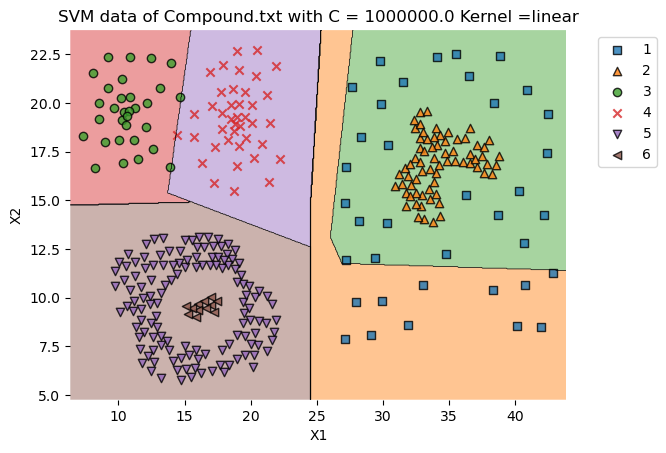

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


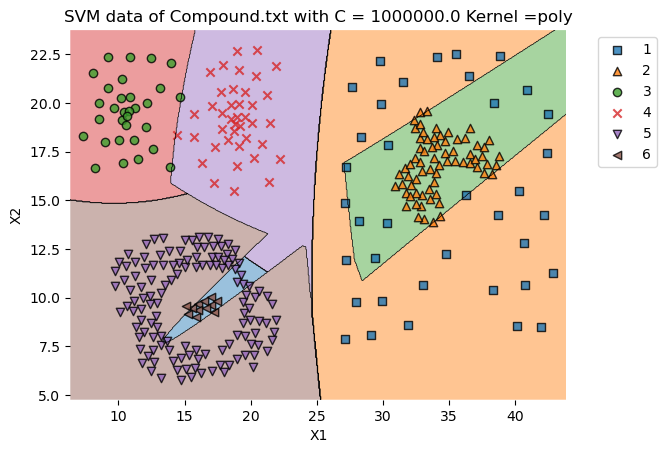

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


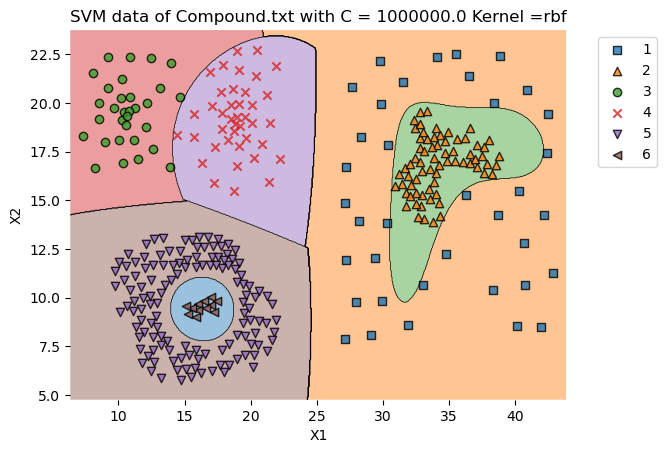

In [85]:
#Diffrent kernel  without regularization as c=1e6
SVM_test(data_array,file_name,'linear',1e6)
SVM_test(data_array,file_name,'poly',1e6)
SVM_test(data_array,file_name,'rbf',1e6)

## Comment

From the above figure, the following observations are noted:

- Linear Kernel:
  - Results: The linear kernel demonstrates a separation between the data, but there are many misclassified data points. Notably, classes 1 and 2 are grouped, and classes 5 and 6 are also combined, with additional misclassifications throughout.

- Polynomial Kernel:
  - Results: The polynomial kernel provides better classification compared to the linear kernel. It successfully separates classes that were grouped by the linear kernel, but still exhibits misclassifications.

- RBF Kernel:
  - Results: The RBF kernel stands out as the most effective, exhibiting well-defined separations between classes, and remains unaffected by regularization. It proves to be superior to both the linear and polynomial kernels, showcasing clearer distinctions between classes.


## Use Kernels With Regularization

In this analysis, the RBF kernel, identified as the most effective from the previous analysis, was chosen. The regularization parameter (C) was varied to observe the impact on classification. Two sets of experiments were conducted: one with a soft margin (small C values - 0.01 and 0.1) and another with a hard margin (large C values - 10 and 100).

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


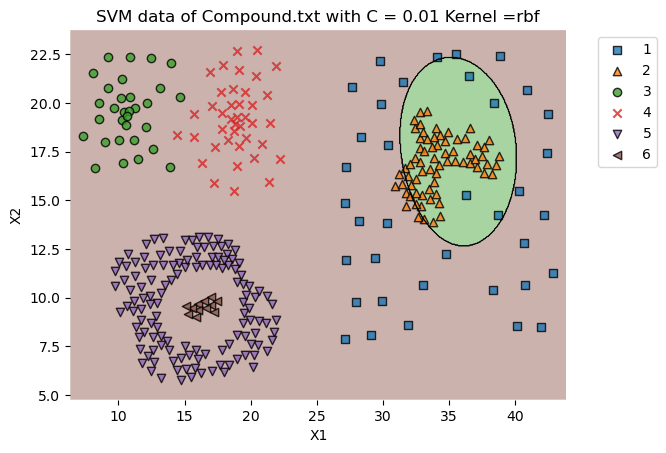

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


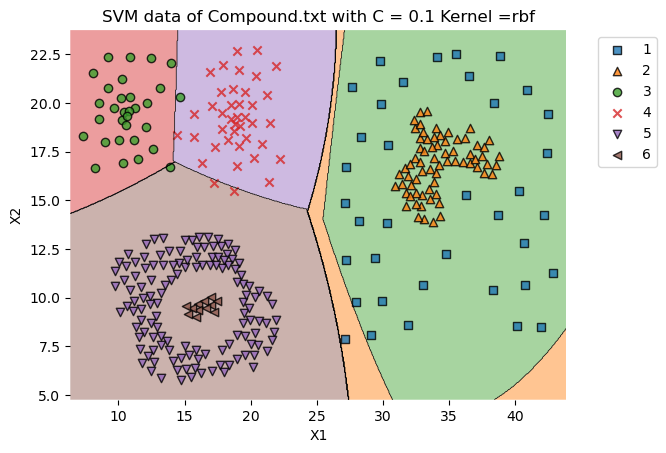

In [86]:
 # soft Magrin 
SVM_test(data_array,file_name,'rbf',0.01)
SVM_test(data_array,file_name,'rbf',0.1)

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


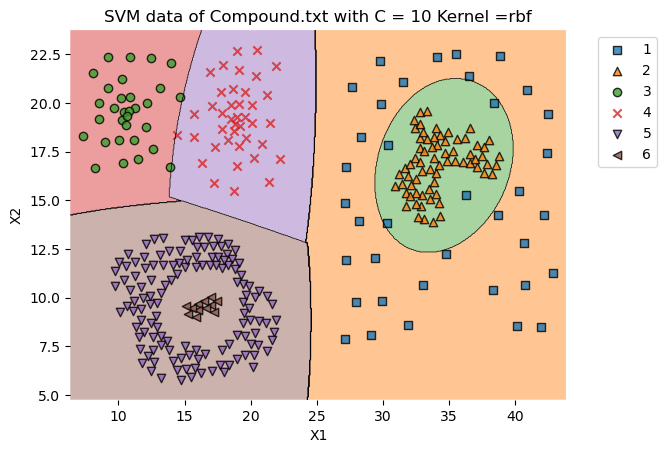

F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


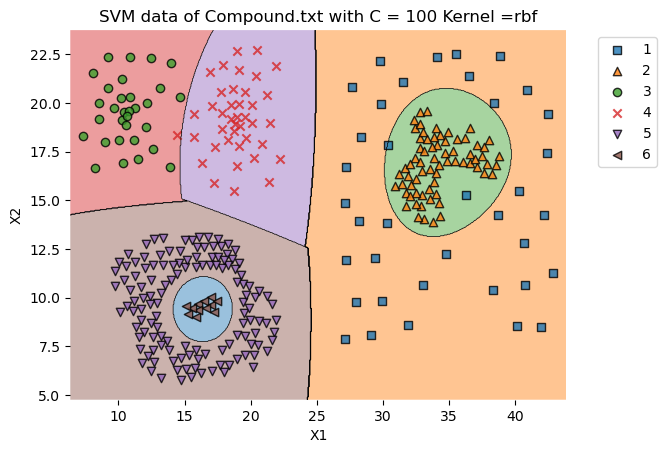

In [87]:
# Hard Magrin 
SVM_test(data_array,file_name,'rbf',10)
SVM_test(data_array,file_name,'rbf',100)

## Comment

From the above figure, the following observations are noted:

- RBF Kernel with Soft Margin (C=0.01):
  - Results: The RBF kernel with a soft margin (C=0.01) demonstrates a more flexible decision boundary, accommodating a certain degree of misclassification. However, the decision boundary may not be clearly apparent in the provided figure.

- RBF Kernel with Soft Margin (C=0.1):
  - Results: Increasing the soft margin (C=0.1) maintains flexibility in the decision boundary, with slightly improved classification, and the decision boundary becomes more clearly apparent.

- RBF Kernel with Hard Margin (C=10):
  - Results: The RBF kernel with a hard margin (C=10) imposes a stricter decision boundary, minimizing misclassification but potentially leading to overfitting. Notably, classes 5 and 6 appear to be classified as a single group.

- RBF Kernel with Hard Margin (C=100):
  - Results:Further increasing the hard margin (C=100) continues to minimize misclassification, but caution is needed to avoid overfitting. All classes are strictly classified, but the potential for overfitting should be considered.


## GridSearchCV (Bonus)

In this section, a tuning function utilizes GridSearchCV to find optimal hyperparameters for an SVM model. The hyperparameters are tuned within specific ranges:

- `C` values range from 0.01 to 10.
- `gamma` values range from 0.01 to 10.
- Only the 'rbf' kernel is considered.

The GridSearchCV process involves a 10-fold cross-validated search over the specified parameter ranges, employing accuracy as the scoring metric. The best hyperparameters identified by GridSearchCV are printed, and the model's best score is displayed.

Subsequently, the tuned hyperparameters are used as inputs for the `SVC` function to create an SVM model. This model is then evaluated on the test data, and the resulting accuracy is also displayed.

model best score =  0.9467741935483872
Accuracy of model on test data = 0.925


F:\Anconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


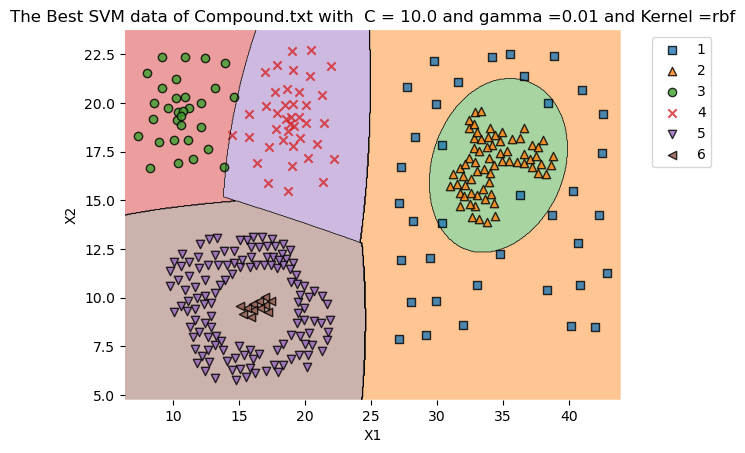

In [88]:
#Best kernel affter tuining 
SVM_best_train(data_array,file_name)

## Comment

From the above figure, optimal hyperparameters for the SVM model are identified:
- `C`: 10.0
- `gamma`: 0.01
- Kernel: RBF

The GridSearchCV process achieved a model best score of 0.947. Subsequently, applying these tuned hyperparameters to the SVM model and assessing it on the test data resulted in an impressive accuracy of 92.5%. This indicates that the model, based on these tuned parameters, is expected to perform well, considering the high accuracy observed.

## Flame.txt

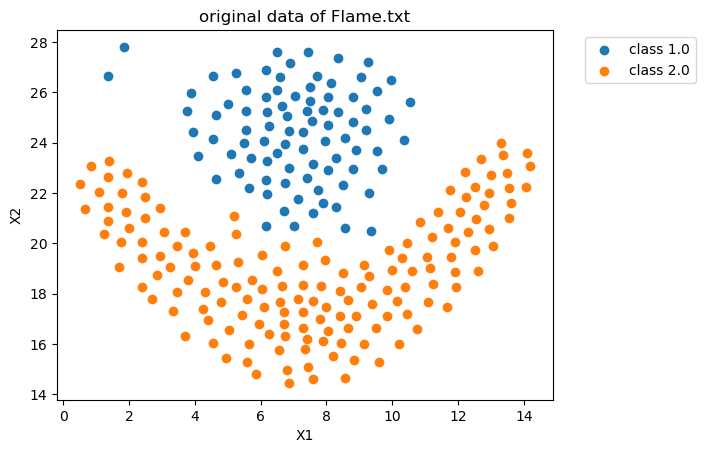

In [89]:
## get data and split plot the orginal data 
file_name = 'Flame.txt'
data_array = file_load(file_name)
X=data_array[:,:2]
Y=data_array[:,2].astype(int)
plot(data_array, file_name)

## Comment
The Flame dataset consists of 2 labeled classes, visually separated by what appears to be a quadratic curve, as indicated by the trend in the graph above.

## Different Kernels Without Regularization

For this analysis, three different kernels (Linear, Polynomial, RBF) were applied without regularization. In the absence of regularization, the regularization parameter (C) was set to a large value (10^6) to minimize its effect, making it negligible.

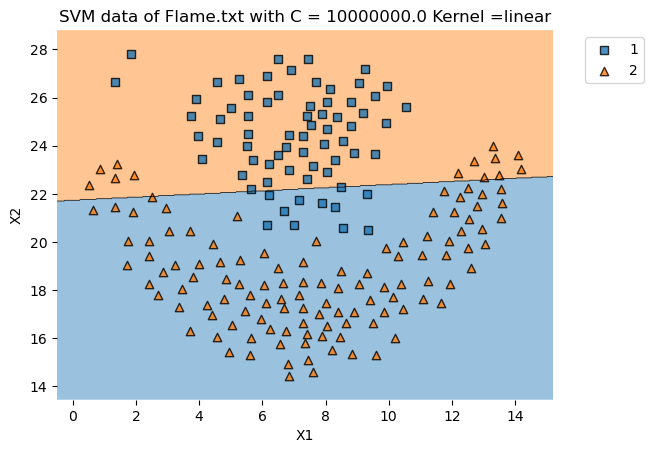

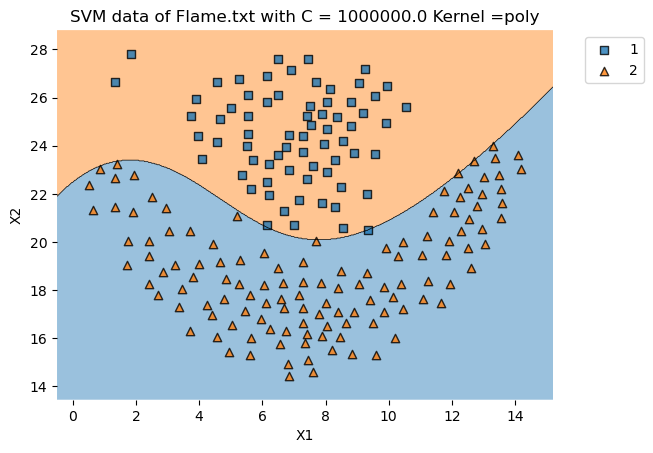

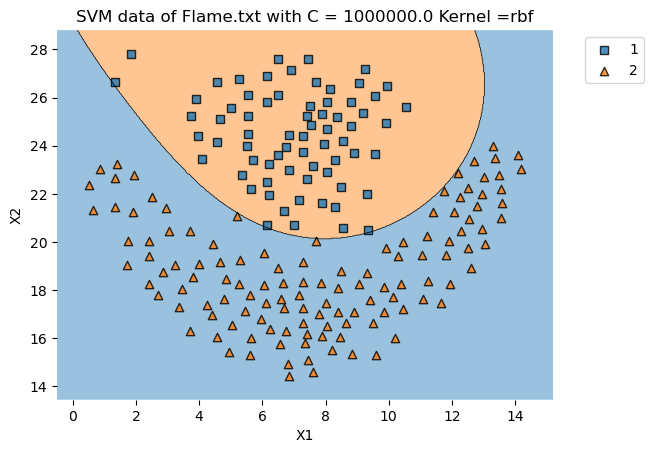

In [56]:
## test all type diffrent types of kernals without without regularization as c=1
#Diffrent kernel
SVM_test(data_array,file_name,'linear',10e6)
SVM_test(data_array,file_name,'poly',1e6)
SVM_test(data_array,file_name,'rbf',1e6)

## Comment 

From the above figure, the following observations are noted:

- Linear Kernel:
  - Results: The linear kernel demonstrates a separation between the data; however, there are many data points that are not correctly classified, indicating some ambiguity.

- Polynomial Kernel:
  - Results: The polynomial kernel, without regularization, provides clearer classification compared to the linear kernel. It successfully distinguishes between classes with improved accuracy.

- RBF Kernel:
  - Results: The RBF kernel stands out as the most effective, exhibiting well-defined separations between classes, and remains unaffected by regularization. It proves to be superior to both the linear and polynomial kernels.


## Use Kernels With Regularization

In this analysis, the RBF kernel, identified as the most effective from the previous analysis, was chosen. The regularization parameter (C) was varied to observe the impact on classification. Two sets of experiments were conducted: one with a soft margin (small C values - 0.01 and 0.1) and another with a hard margin (large C values - 10 and 100).

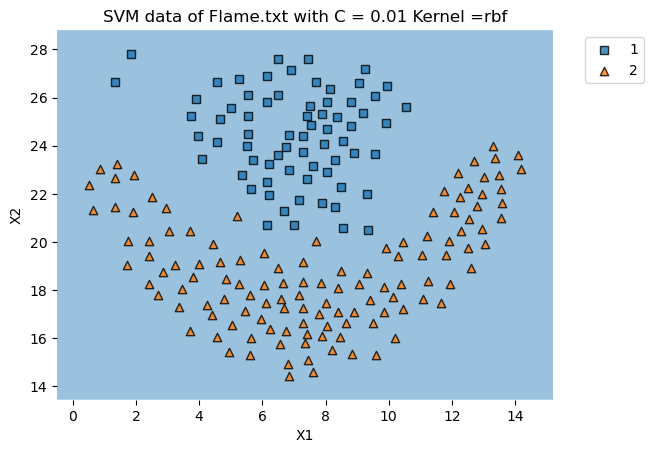

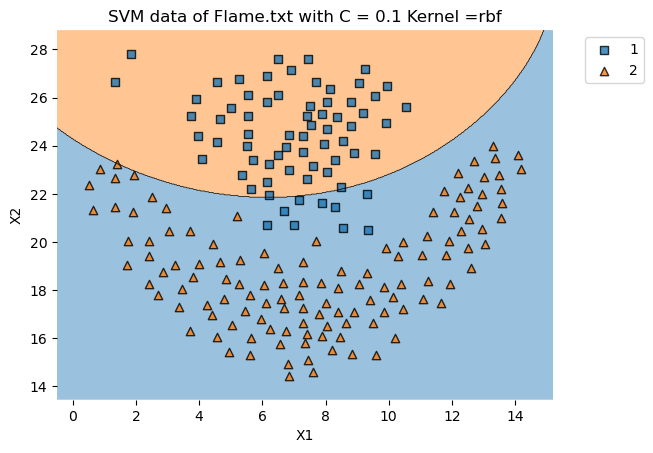

In [90]:
# soft Magrin 
SVM_test(data_array,file_name,'rbf',0.01)
SVM_test(data_array,file_name,'rbf',0.1)

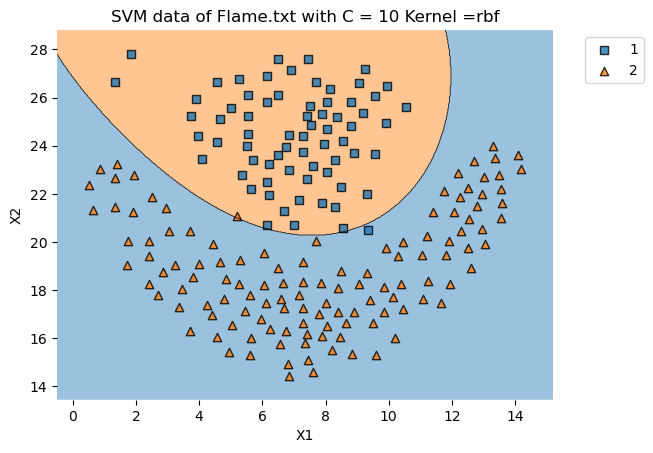

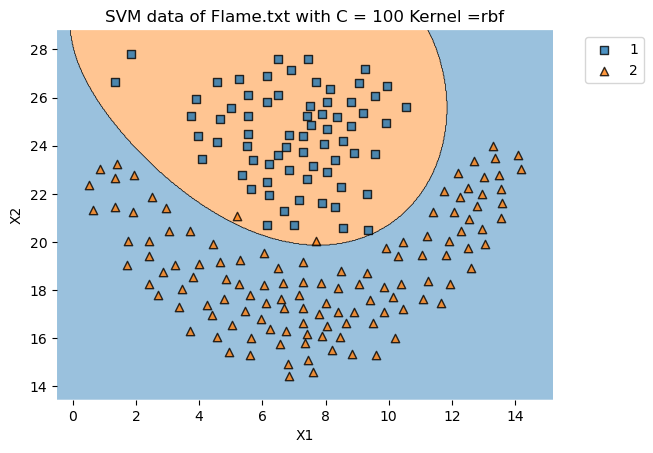

In [58]:
# Hard Magrin 
SVM_test(data_array,file_name,'rbf',10)
SVM_test(data_array,file_name,'rbf',100)

## Comment

From the above figure, the following observations are noted:

- RBF Kernel with Soft Margin (C=0.01):
  - Results: The RBF kernel with a soft margin (C=0.01) demonstrates a more flexible decision boundary, accommodating a certain degree of misclassification. However, it's important to note that in the provided figure, the decision boundary may not be clearly apparent.

- RBF Kernel with Soft Margin (C=0.1):
  - Results: Increasing the soft margin (C=0.1) still allows for flexibility in the decision boundary, with slightly improved classification.

- RBF Kernel with Hard Margin (C=10):
  - Results: The RBF kernel with a hard margin (C=10) imposes a stricter decision boundary, minimizing misclassification but potentially leading to overfitting.

- RBF Kernel with Hard Margin (C=100):
  - Results: Further increasing the hard margin (C=100) continues to minimize misclassification, but caution is needed to avoid overfitting. While there is no clear evidence of overfitting in the current figure, it is advisable to carefully assess the model's performance on additional data.

## GridSearchCV (Bonus)

In this section, a tuning function utilizes GridSearchCV to find optimal hyperparameters for an SVM model. The hyperparameters are tuned within specific ranges:

- `C` values range from 0.01 to 10.
- `gamma` values range from 0.01 to 10.
- Only the 'rbf' kernel is considered.

The GridSearchCV process involves a 10-fold cross-validated search over the specified parameter ranges, employing accuracy as the scoring metric. The best hyperparameters identified by GridSearchCV are printed, and the model's best score is displayed.

Subsequently, the tuned hyperparameters are used as inputs for the `SVC` function to create an SVM model. This model is then evaluated on the test data, and the resulting accuracy is also displayed.

model best score =  0.9894736842105264
Accuracy of model on test data = 1.0


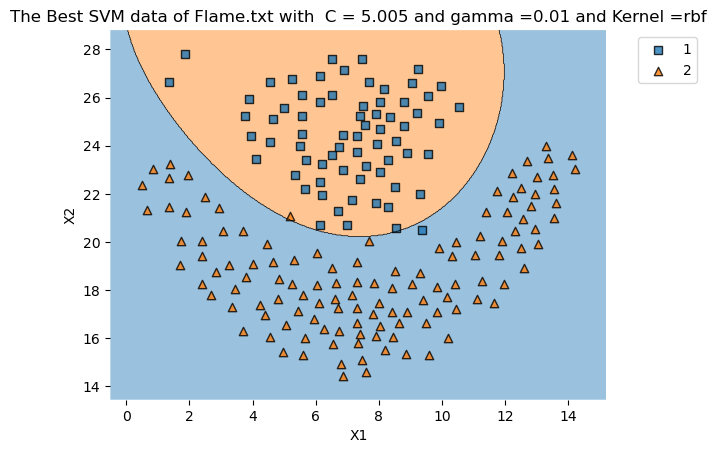

In [60]:
#Best kernel affter tuining 
SVM_best_train(data_array,file_name)

## Comment

From the above figure, we observe that the best hyperparameters for the SVM model are determined as follows:
- `C`: 5.005
- `gamma`: 0.01
- Kernel: RBF

The GridSearchCV process identified these parameters, resulting in a model best score of 0.9895. Subsequently, using these tuned hyperparameters in the SVM model and evaluating it on the test data yielded a remarkable accuracy of 1.0 (100%). This suggests that the model, based on the optimized parameters, performs exceptionally well on the given dataset.

## Jain.txt

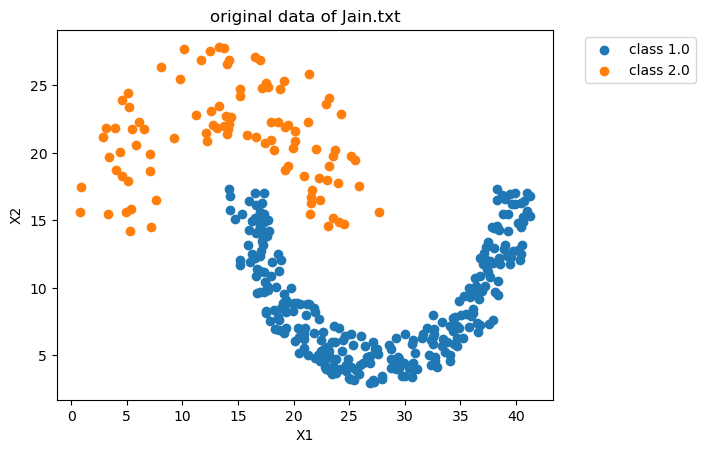

In [61]:
## get data and split plot the orginal data 
file_name = 'Jain.txt'
data_array = file_load(file_name)
X=data_array[:,:2]
Y=data_array[:,2].astype(int)
plot(data_array, file_name)

## Comment
In the Jain dataset, featuring 2 labeled classes, the visual representation suggests a separation defined by a cubic curve, as apparent from the observed trend in the graph above.

## Different Kernels Without Regularization
For this analysis, three different kernels (Linear, Polynomial, RBF) were applied without regularization. In the absence of regularization, the regularization parameter (C) was set to a large value (10^6) to minimize its effect, making it negligible.

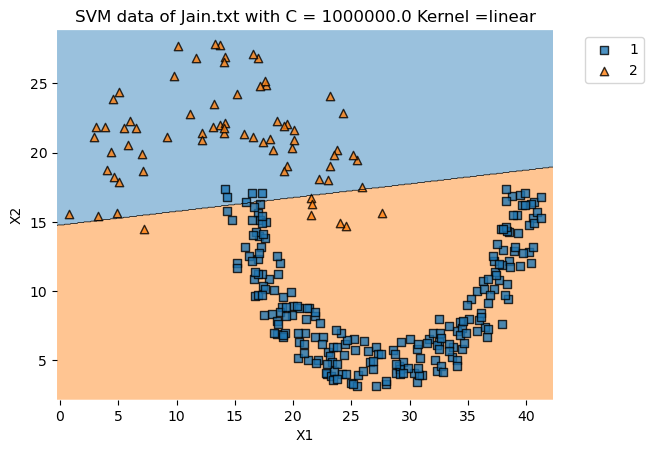

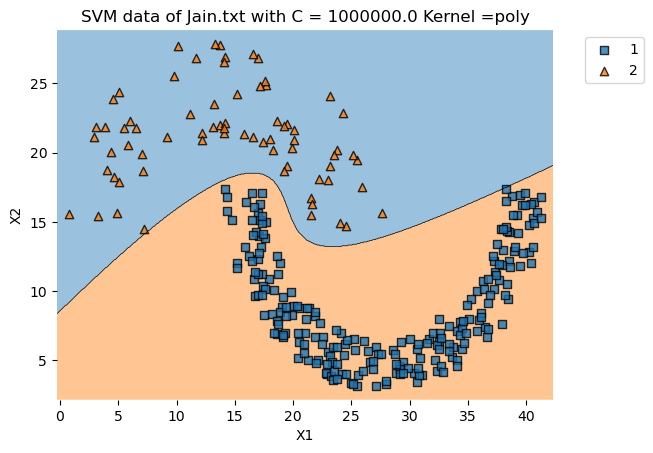

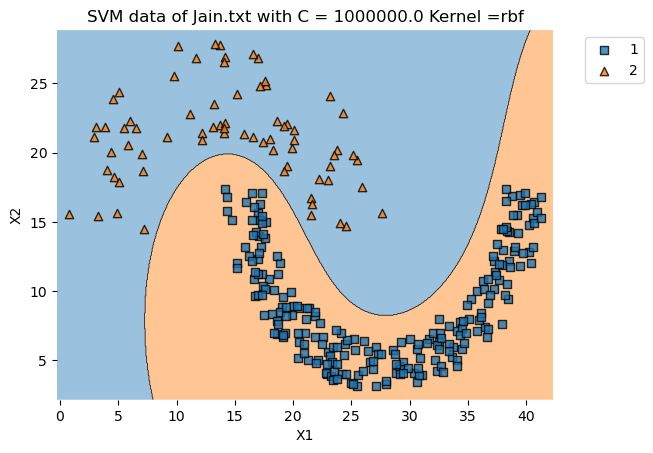

In [62]:
#Diffrent kernel without regularization as c=1e6
SVM_test(data_array,file_name,'linear',1e6)
SVM_test(data_array,file_name,'poly',1e6)
SVM_test(data_array,file_name,'rbf',1e6)

## Comment

- Linear Kernel:
    - The linear kernel shows some separation but struggles with misclassifications, indicating ambiguity.

- Polynomial Kernel:
    - Without regularization, the polynomial kernel achieves clearer classification, outperforming the linear kernel.

- RBF Kernel:
     - The RBF kernel excels, maintaining well-defined separations between classes, proving superior to linear and polynomial kernels.

## Use Kernels With Regularization

In this analysis, the RBF kernel, identified as the most effective from the previous analysis, was chosen. The regularization parameter (C) was varied to observe the impact on classification. Two sets of experiments were conducted: one with a soft margin (small C values - 0.01 and 0.1) and another with a hard margin (large C values - 10 and 100).

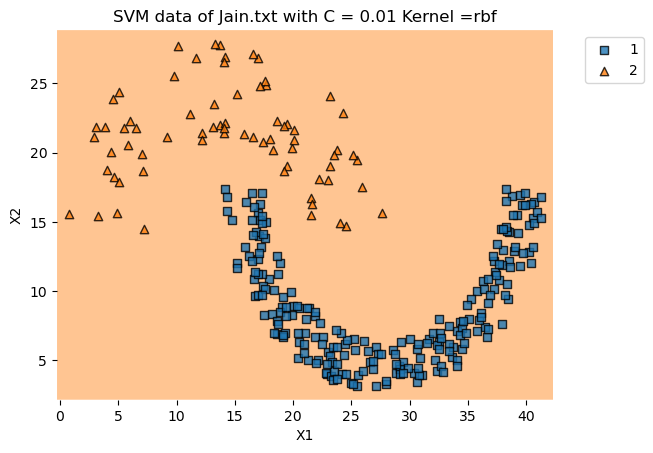

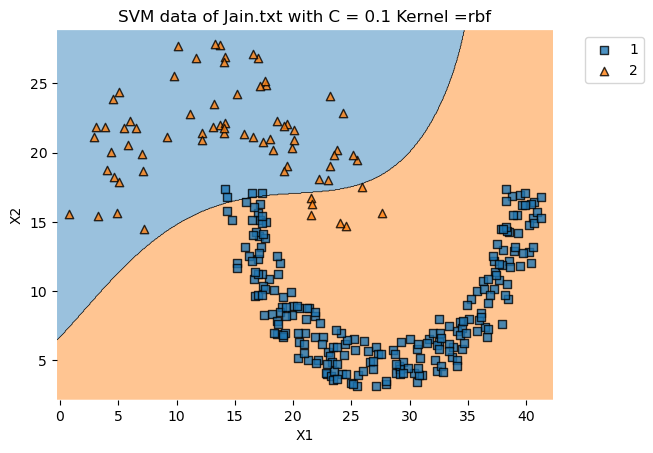

In [64]:
# soft Magrin 
SVM_test(data_array,file_name,'rbf',0.01)
SVM_test(data_array,file_name,'rbf',0.1)

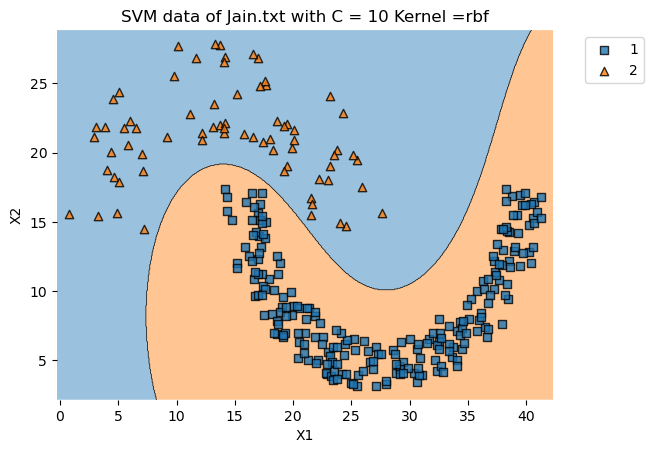

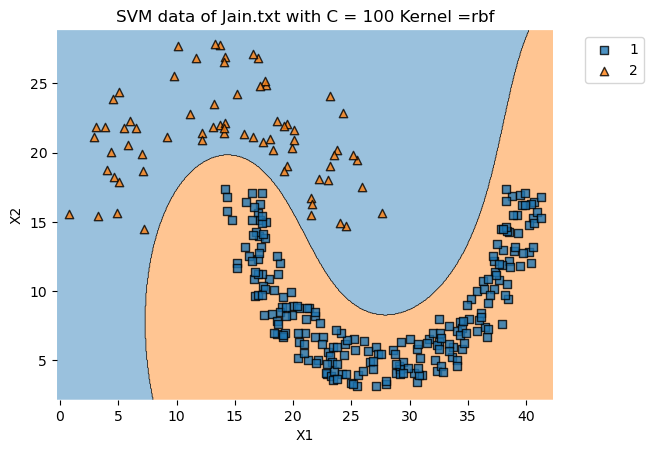

In [65]:
# Hard Magrin 
SVM_test(data_array,file_name,'rbf',10)
SVM_test(data_array,file_name,'rbf',100)

## Comment

From the above figure, the following observations are noted:

- RBF Kernel with Soft Margin (C=0.01): A flexible boundary accommodating some misclassification; decision boundary not clearly apparent in the figure.

- RBF Kernel with Soft Margin (C=0.1): Slightly improved flexibility in the decision boundary.

- RBF Kernel with Hard Margin (C=10): Stricter boundary, minimizing misclassification but risking overfitting.

- RBF Kernel with Hard Margin (C=100): Continues to minimize misclassification; caution advised to prevent potential overfitting.


## GridSearchCV (Bonus)

In this section, a tuning function utilizes GridSearchCV to find optimal hyperparameters for an SVM model. The hyperparameters are tuned within specific ranges:

- `C` values range from 0.01 to 10.
- `gamma` values range from 0.01 to 10.
- Only the 'rbf' kernel is considered.

The GridSearchCV process involves a 10-fold cross-validated search over the specified parameter ranges, employing accuracy as the scoring metric. The best hyperparameters identified by GridSearchCV are printed, and the model's best score is displayed.

Subsequently, the tuned hyperparameters are used as inputs for the `SVC` function to create an SVM model. This model is then evaluated on the test data, and the resulting accuracy is also displayed.

model best score =  1.0
Accuracy of model on test data = 1.0


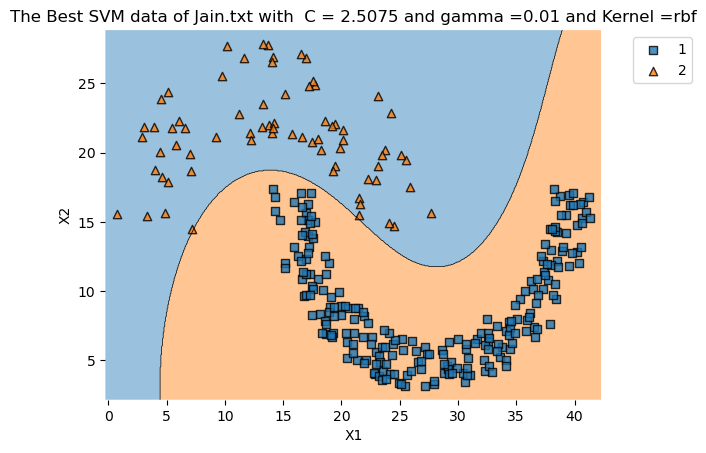

In [66]:
#Best kernel affter tuining 
SVM_best_train(data_array,file_name)

## Comment

From the above figure, we observe that the best hyperparameters for the SVM model are determined as follows:
- `C`: 2.5075
- `gamma`: 0.01
- Kernel: RBF

The GridSearchCV process identified these parameters, resulting in a model best score of 1. Subsequently, using these tuned hyperparameters in the SVM model and evaluating it on the test data yielded a remarkable accuracy of 1.0 (100%). This suggests that the model, based on the optimized parameters, performs exceptionally well on the given dataset.

## Pathbased.txt

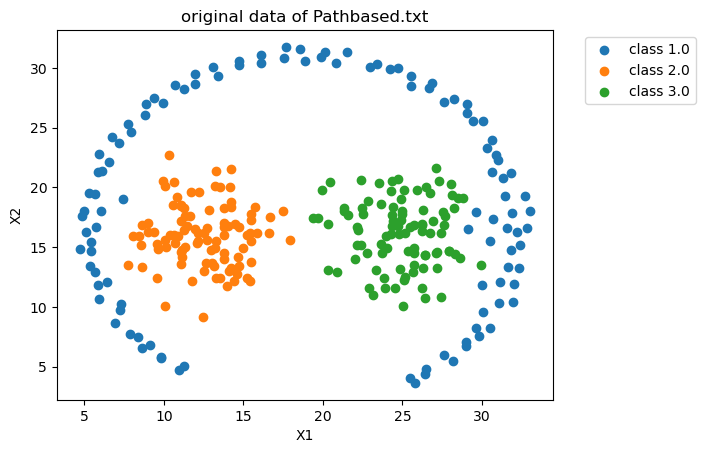

In [92]:
## get data and split plot the orginal data 
file_name = 'Pathbased.txt'
data_array = file_load(file_name)
X=data_array[:,:2]
Y=data_array[:,2].astype(int)
plot(data_array, file_name)

## Comment

Within the Pathbased dataset, encompassing 3 labeled classes, there is a distinct separation observed among classes 2 and 3. However, class 1 exhibits a circular trend around classes 2 and 3, suggesting that it cannot be easily separated by a linear classifier.

## Different Kernels Without Regularization
For this analysis, three different kernels (Linear, Polynomial, RBF) were applied without regularization. In the absence of regularization, the regularization parameter (C) was set to a large value (10^6) to minimize its effect, making it negligible.

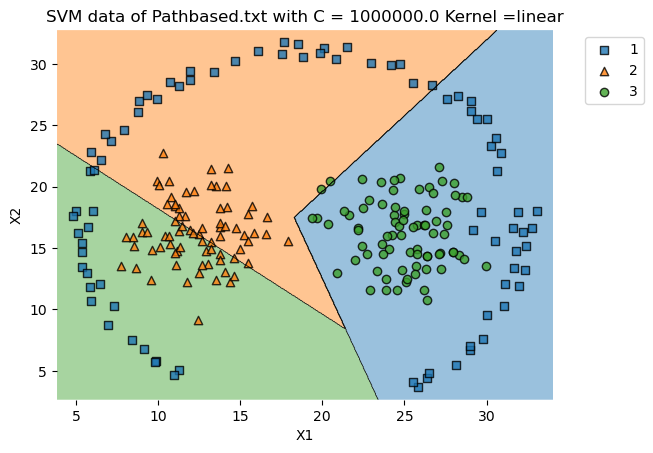

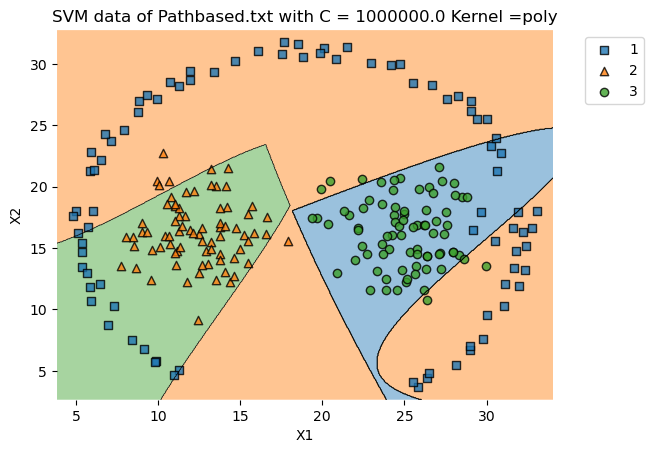

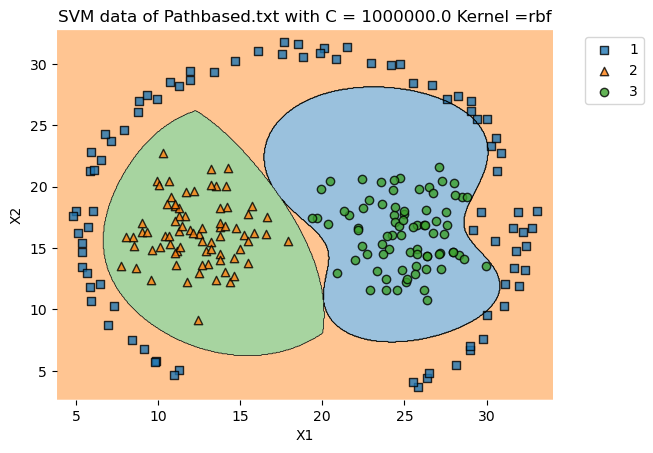

In [71]:
#Diffrent kernel without regularization as c=1e6
SVM_test(data_array,file_name,'linear',1e6)
SVM_test(data_array,file_name,'poly',1e6)
SVM_test(data_array,file_name,'rbf',1e6)

## Comment

- Linear Kernel:
    - The linear kernel classifier performs poorly, with many misclassified data points and insufficient separation.

- Polynomial Kernel:
    - The polynomial kernel exhibits improved classification for classes 2 and 3 compared to the linear kernel. However, it struggles with accurate classification for class 1.

- RBF Kernel:
     - The RBF kernel outperforms both linear and polynomial kernels, providing clearer and more accurate classification for the dataset.


## Use Kernels With Regularization

In this analysis, the RBF kernel, identified as the most effective from the previous analysis, was chosen. The regularization parameter (C) was varied to observe the impact on classification. Two sets of experiments were conducted: one with a soft margin (small C values - 0.01 and 0.1) and another with a hard margin (large C values - 10 and 100).

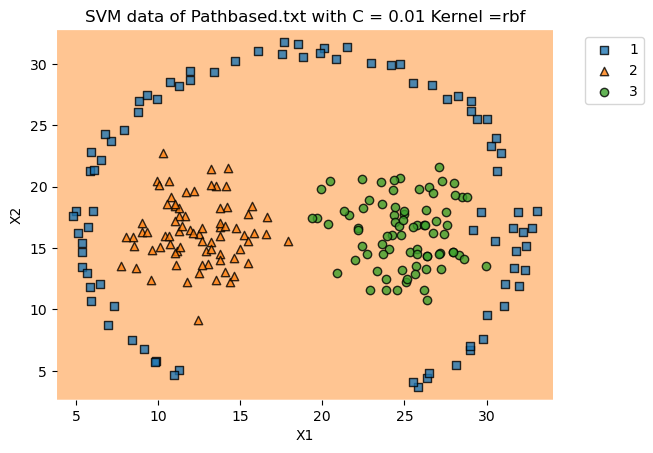

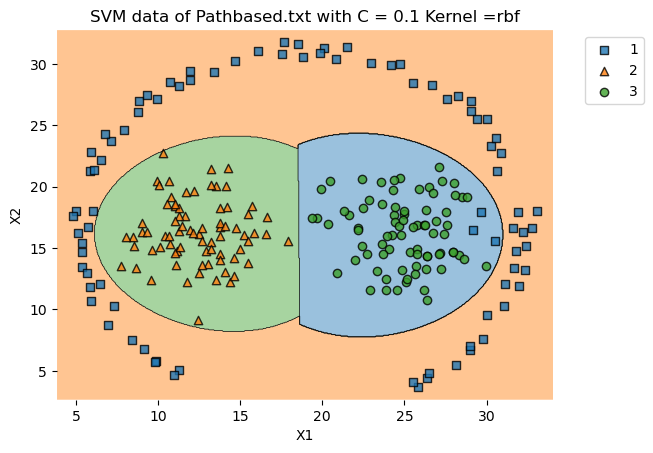

In [93]:
# soft Magrin 
SVM_test(data_array,file_name,'rbf',0.01)
SVM_test(data_array,file_name,'rbf',0.1)

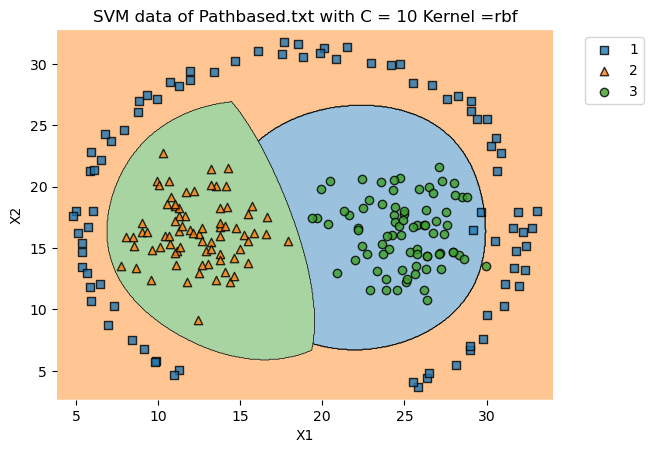

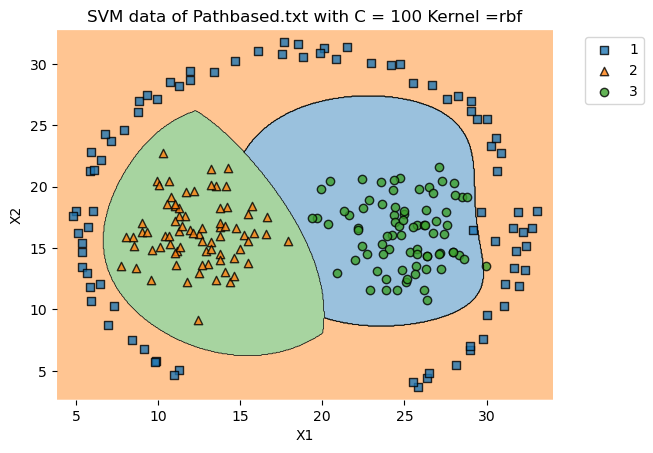

In [73]:
# Hard Magrin 
SVM_test(data_array,file_name,'rbf',10)
SVM_test(data_array,file_name,'rbf',100)

## Comment

From the above figure, the following observations are noted:

- RBF Kernel with Soft Margin (C=0.01): A flexible boundary accommodating some misclassification; decision boundary not clearly apparent in the figure.

- RBF Kernel with Soft Margin (C=0.1): Slightly improved flexibility in the decision boundary.

- RBF Kernel with Hard Margin (C=10): Stricter boundary, minimizing misclassification but risking overfitting.

- RBF Kernel with Hard Margin (C=100): Continues to minimize misclassification; caution advised to prevent potential overfitting.


## GridSearchCV (Bonus)

In this section, a tuning function utilizes GridSearchCV to find optimal hyperparameters for an SVM model. The hyperparameters are tuned within specific ranges:

- `C` values range from 0.01 to 10.
- `gamma` values range from 0.01 to 10.
- Only the 'rbf' kernel is considered.

The GridSearchCV process involves a 10-fold cross-validated search over the specified parameter ranges, employing accuracy as the scoring metric. The best hyperparameters identified by GridSearchCV are printed, and the model's best score is displayed.

Subsequently, the tuned hyperparameters are used as inputs for the `SVC` function to create an SVM model. This model is then evaluated on the test data, and the resulting accuracy is also displayed.

model best score =  0.9875000000000002
Accuracy of model on test data = 0.9833333333333333


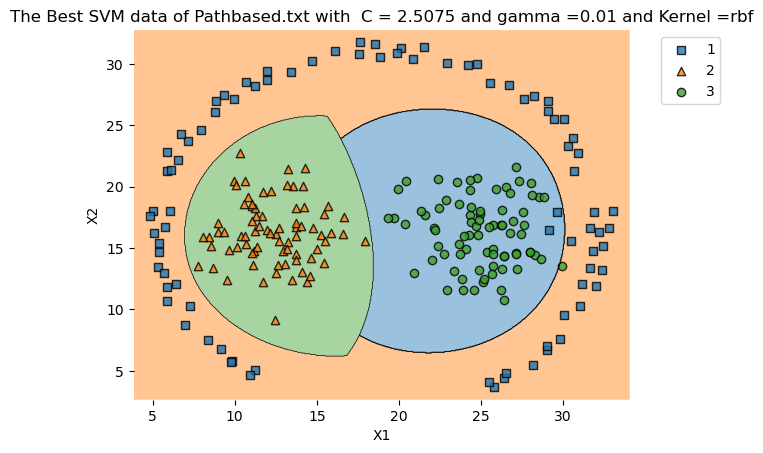

In [74]:
#Best kernel affter tuining 
SVM_best_train(data_array,file_name)

## Comment

From the above figure, optimal hyperparameters for the SVM model are identified:
- `C`: 2.5075
- `gamma`: 0.01
- Kernel: RBF

The GridSearchCV process achieved a model best score of 0.9875. Subsequently, applying these tuned hyperparameters to the SVM model and assessing it on the test data resulted in an impressive accuracy of 98.3% (0.983). This indicates that the model, based on these tuned parameters, is expected to perform well, considering the high accuracy observed.

## Spiral.txt

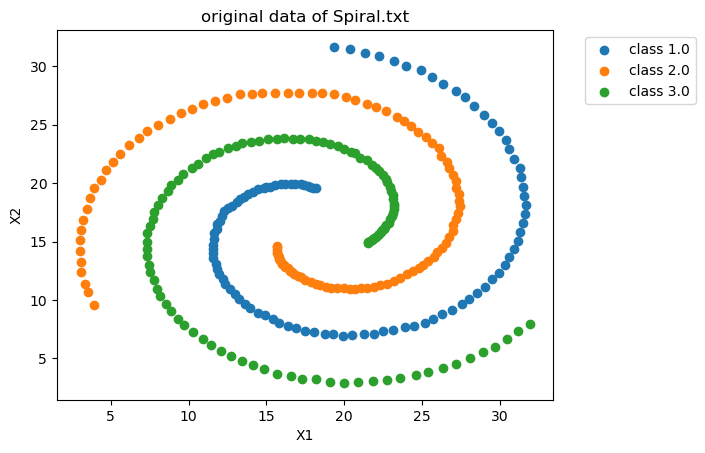

In [75]:
## get data and split plot the orginal data 
file_name = 'Spiral.txt'
data_array = file_load(file_name)
X=data_array[:,:2]
Y=data_array[:,2].astype(int)
plot(data_array, file_name)

## Comment

In the Spiral dataset, featuring 3 labeled classes, the trend of the classes appears to form a visually distinguishable spiral shape.

## Different Kernels Without Regularization
For this analysis, three different kernels (Linear, Polynomial, RBF) were applied without regularization. In the absence of regularization, the regularization parameter (C) was set to a large value (10^6) to minimize its effect, making it negligible.

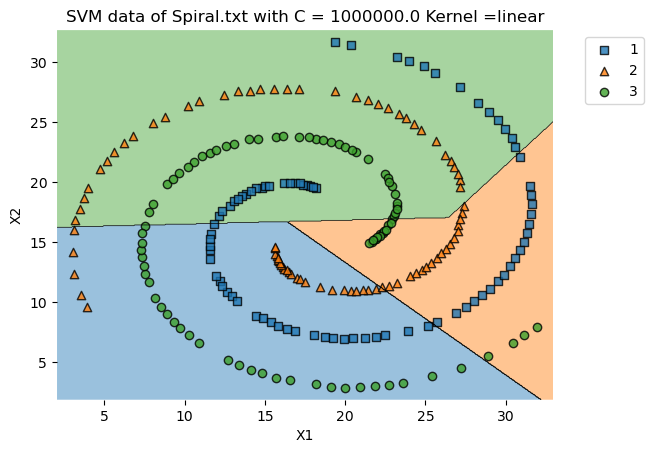

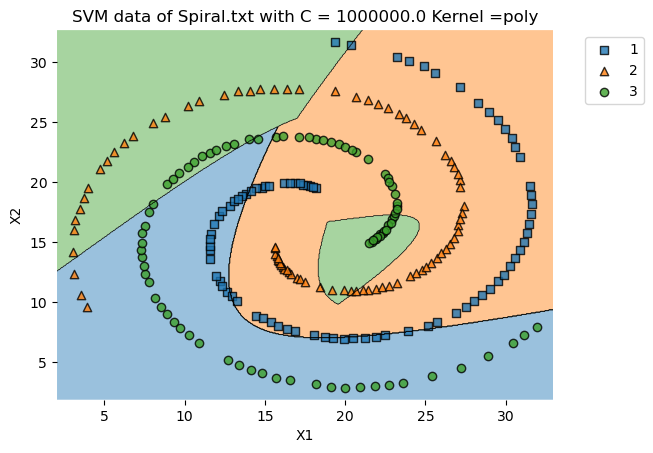

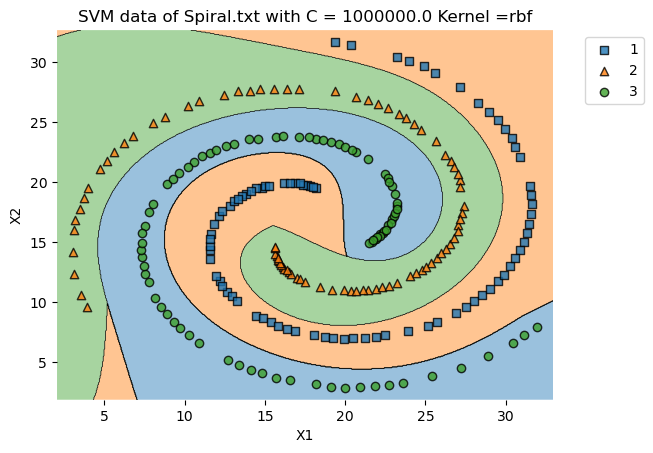

In [76]:
#Diffrent kernel  without regularization as c=1e6
SVM_test(data_array,file_name,'linear',1e6)
SVM_test(data_array,file_name,'poly',1e6)
SVM_test(data_array,file_name,'rbf',1e6)

## Comment

- Linear Kernel:
    - The linear kernel classifier performs poorly, with many misclassified data points and insufficient separation.

- Polynomial Kernel:
    - The polynomial kernel exhibits slight improvement compared to the linear kernel, but there are still many misclassified data points and insufficient separation.

- RBF Kernel:
     - The RBF kernel outperforms both linear and polynomial kernels, providing clearer and more accurate classification for the dataset.


## Use Kernels With Regularization

In this analysis, the RBF kernel, identified as the most effective from the previous analysis, was chosen. The regularization parameter (C) was varied to observe the impact on classification. Two sets of experiments were conducted: one with a soft margin (small C values - 0.01 and 0.1) and another with a hard margin (large C values - 10 and 100).

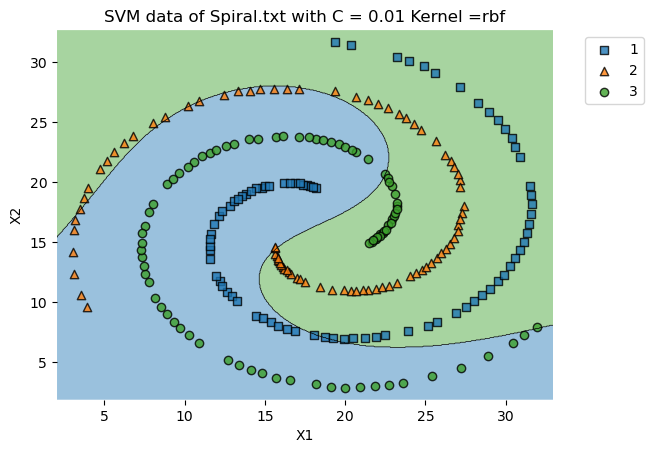

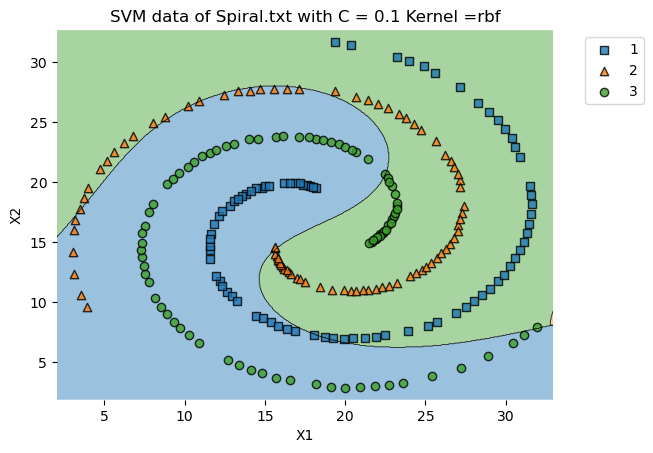

In [40]:
# soft Magrin 
SVM_test(data_array,file_name,'rbf',0.01)
SVM_test(data_array,file_name,'rbf',0.1)

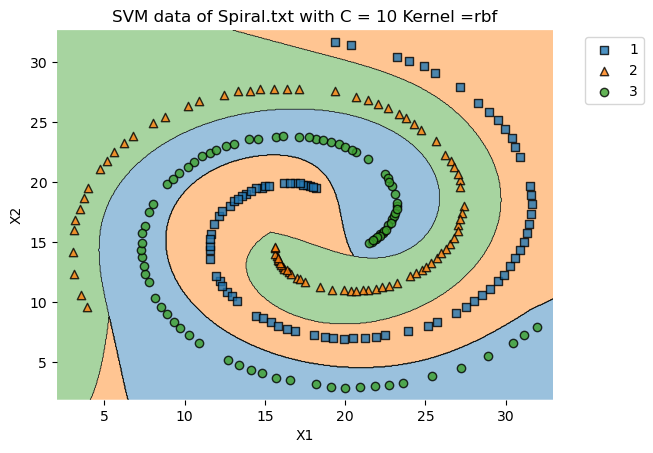

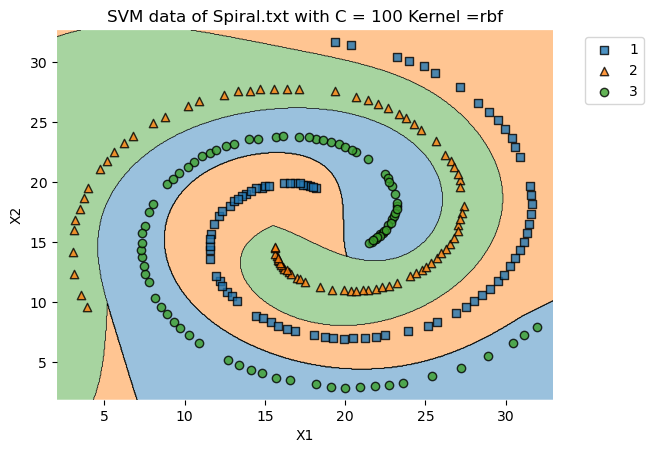

In [41]:
# Hard Magrin 
SVM_test(data_array,file_name,'rbf',10)
SVM_test(data_array,file_name,'rbf',100)

## Comment

From the above figure, the following observations are noted:

- RBF Kernel with Soft Margin (C=0.01): Offers a flexible boundary accommodating some misclassification; the decision boundary is not clearly apparent in the figure.

- RBF Kernel with Soft Margin (C=0.1): No significant improvement observed in the decision boundary.

- RBF Kernel with Hard Margin (C=10): Imposes a stricter boundary, minimizing misclassification but risking overfitting.

- RBF Kernel with Hard Margin (C=100): Continues to minimize misclassification; caution advised to prevent potential overfitting.

model best score =  1.0
Accuracy of model on test data = 1.0


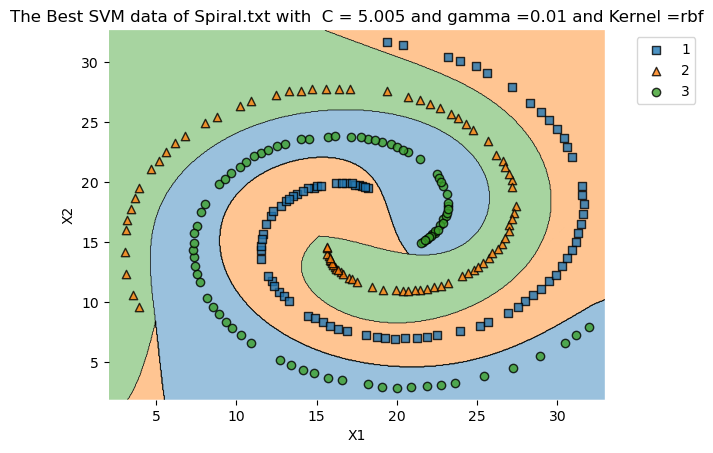

In [77]:
#Best kernel affter tuining 
SVM_best_train(data_array,file_name)

## Comment

From the above figure, we observe that the best hyperparameters for the SVM model are determined as follows:
- `C`: 5.005
- `gamma`: 0.01
- Kernel: RBF

The GridSearchCV process identified these parameters, resulting in a model best score of 1. Subsequently, using these tuned hyperparameters in the SVM model and evaluating it on the test data yielded a remarkable accuracy of 1.0 (100%). This suggests that the model, based on the optimized parameters, performs exceptionally well on the given dataset.